# Project: Investigate a Dataset - [No-show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.


### Data Dictionary
* **PatientId:** Identification of a patient.
* **AppointmentID:** Identification of each appointment.
* **Gender:** Male or Female.
* **ScheduledDay:** The day someone called or registered the appointment.
* **AppointmentDay:** The day of the actuall appointment, when they have to visit the doctor.
* **Age:** How old is the patient.
* **Neighbourhood:** Where the appointment takes place.
* **Scholarship:** True of False
* **Hipertension:** True or False
* **Diabetes:** True or False
* **Alcoholism:** True or False
* **Handcap:** True or False
* **SMS_received:** messages sent to the patient.
* **No-show:** True or False


### Question(s) for Analysis
**Q1: How many percent of patients missed appointment?**  
**Q2: Comparison between No-Show / Show based on Gender of the patient?**  
**Q3: Comparison between No-Show / Show based on Age of the patient?**  
**Q4: Comparison between No-Show / Show based on receiving an SMS message or not?**  

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sb
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv("noshowappointments-kagglev2-may-2016.csv", index_col = False)

#printing first five rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# this returns a tuple of the dimensions of the dataframe (rows, column)
df.shape

(110527, 14)

In [4]:
# this displays a concise summary of the dataframe,
# including the number of non-null values in each column
# also the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Statistical describion of DataFrame
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# check for Null value in the data
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
# check for duplicates in the data
sum(df.duplicated())

0

In [8]:
# display value count
df["No-show"].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [9]:
df["Age"].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [10]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [11]:
df.Gender.unique()

array(['F', 'M'], dtype=object)


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

### - Fixing typos columns name

In [12]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.rename(columns={'PatientId':'PatientID', 'SMS_received':'ReceivedSMS', 'No-show':'NoShow'},inplace=True)
df.columns

Index(['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'ReceivedSMS', 'NoShow'],
      dtype='object')

### -Convert some data to be numeric 0 and 1 to use it in plot or goupby

In [13]:
# Convert NoShow column
df['NoShow'] = df['NoShow'].str.replace('No','0')
df['NoShow'] = df['NoShow'].str.replace('Yes','1')
df.NoShow.value_counts()

0    88208
1    22319
Name: NoShow, dtype: int64

In [14]:
# Convert Gender column
df['Gender'] = df['Gender'].str.replace('F','0')
df['Gender'] = df['Gender'].str.replace('M','1')
df.Gender=df.Gender.astype(int)
df.Gender.value_counts()

0    71840
1    38687
Name: Gender, dtype: int64

### - Converting columns that has date to a datetime datatype

In [15]:
df.ScheduledDay=pd.to_datetime(df.ScheduledDay).dt.date.astype('datetime64[ns]')
df.AppointmentDay=pd.to_datetime(df.AppointmentDay).dt.date.astype('datetime64[ns]')

# this returns the datatypes of the columns
df.dtypes

PatientID                float64
AppointmentID              int64
Gender                     int32
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
ReceivedSMS                int64
NoShow                    object
dtype: object

In [16]:
df[['ScheduledDay','AppointmentDay']]

,ScheduledDay,AppointmentDay
0,2016-04-29,2016-04-29
1,2016-04-29,2016-04-29
2,2016-04-29,2016-04-29
3,2016-04-29,2016-04-29
4,2016-04-29,2016-04-29
...,...,...
110522,2016-05-03,2016-06-07
110523,2016-05-03,2016-06-07
110524,2016-04-27,2016-06-07
110525,2016-04-27,2016-06-07


In [17]:
df.NoShow=df.NoShow.astype(int)
df.dtypes

PatientID                float64
AppointmentID              int64
Gender                     int32
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
ReceivedSMS                int64
NoShow                     int32
dtype: object

### - Removed some of the columns from the dataframe that was not needed which are Scholarship, Hipertension, Diabetes, Alcoholism and Handcap


In [18]:
df.drop(columns=['Scholarship', 'Hipertension', 'Diabetes','Alcoholism', 'Handcap'],inplace=True)

In [19]:
df.head(2)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,ReceivedSMS,NoShow
0,2.987250e+13,5642903,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,0
1,5.589978e+14,5642503,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0


In [20]:
print(df.shape)

(110527, 9)


### - Remove Age value less than 0

In [21]:
df.drop(df.query("Age < 0 ").index,inplace=True)
df.shape

(110526, 9)

In [22]:
df.describe()

,PatientID,AppointmentID,Gender,Age,ReceivedSMS,NoShow
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,0.350026,37.089219,0.321029,0.201934
std,2.560943e+14,7.129544e+04,0.476980,23.110026,0.466874,0.401445
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,0.000000,18.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,0.000000,37.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,1.000000,55.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,1.000000,115.000000,1.000000,1.000000


<AxesSubplot:>

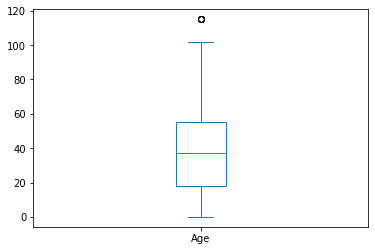

In [23]:
# Checking Age outliers
df.Age.plot(kind='box')

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.



### Histogram of each column

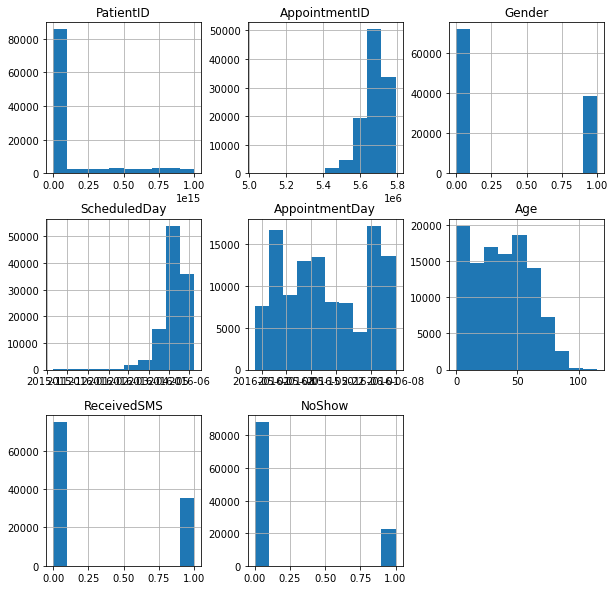

In [24]:
df.hist(figsize= (10,10));

### Correlation between each column
There is range between 1 upto -1. The relation will be strong when goes to 1.

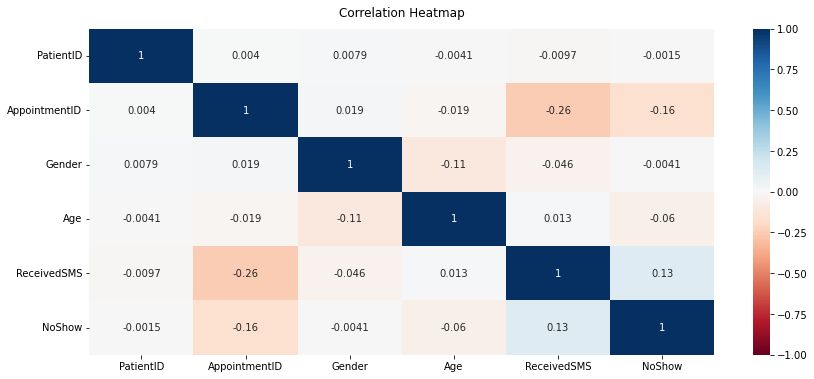

In [25]:
plot.figure(figsize=(14, 6))
sb.heatmap(df.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True)
plot.title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

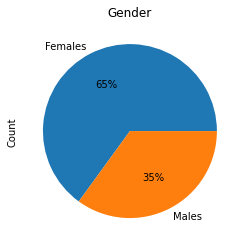

Percentage of Gender 0: Female, 1: Male
0    65.0
1    35.0
Name: Gender, dtype: float64


In [26]:
df.Gender.value_counts().plot(kind="pie",labels=["Females","Males"],   autopct='%1.0f%%');
plot.ylabel("Count");
plot.title("Gender");
plot.show();

print("Percentage of Gender 0: Female, 1: Male")
print(round(df.Gender.value_counts()/len(df)*100))

In [27]:
# making DataFram for miss and show
df_miss=df[df["NoShow"] == 1]
df_show=df[df["NoShow"] == 0]

### Research Question 1 (How many percent of patients missed appointment?)

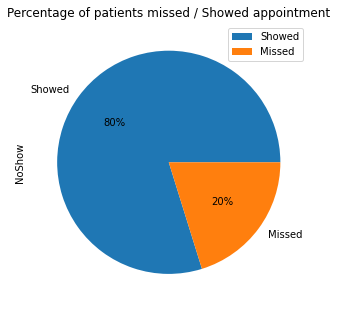

20% of appointments were missed.


In [28]:
# Use this, and more code cells, to explore your data. Don't forget to add
appointments = df.shape[0]
missed = len(df_miss)
missed_ratio = int(round(missed/appointments*100))

df.NoShow.value_counts().plot(kind="pie",autopct='%.0f%%', title="Percentage of patients missed / Showed appointment", labels=['Showed','Missed'], figsize=(5,7))
plot.legend()
plot.show();

print('{}% of appointments were missed.'.format(missed_ratio))

In [29]:
def draw_countplot(sub_df,xlabel,title):
    sb.countplot(x=sub_df, hue=df.NoShow, data=df)
    plot.xticks([0,1],xlabel)
    plot.title(title)
    plot.legend(labels=['Showed','Missed']);
    plot.show();

### Research Question 2  (Comparison between No-Show / Show based on Gender of the patient?)

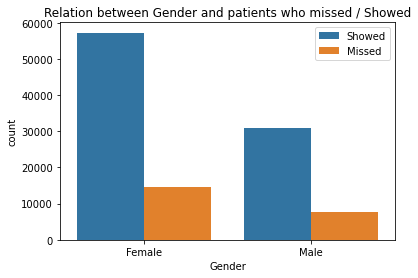

The total patients appointments 110526.
Females appointments 71839, 14594 were missed with the ratio of 20%.
Males appointments 38687, 7725 were missed with the ratio of 20%.


In [30]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
# sb.countplot(x=df.Gender, hue=df.NoShow, data=df)
# plot.xticks([0,1],['Female','Male'])
# plot.title("Relation between Gender and patients who missed / Showed")
# plot.legend(labels=['Showed','Missed']);
# plot.show();

draw_countplot(df.Gender,['Female','Male'],"Relation between Gender and patients who missed / Showed")

# Claculate ratio of Gender
appointments_by_f = len(df[df['Gender'] == 0])
appointments_by_m = len(df[df['Gender'] == 1])

missed_appointments_by_f = len(df_miss[df_miss['Gender']==0])
missed_appointments_by_m = len(df_miss[df_miss['Gender']==1])

missed_ratio_f = int(round(missed_appointments_by_f/appointments_by_f*100))
missed_ratio_m = int(round(missed_appointments_by_m/appointments_by_m*100))

print('The total patients appointments {}.'.format(df.shape[0]))
print('Females appointments {}, {} were missed with the ratio of {}%.'.format(appointments_by_f, missed_appointments_by_f, missed_ratio_f))
print('Males appointments {}, {} were missed with the ratio of {}%.'.format(appointments_by_m, missed_appointments_by_m, missed_ratio_m))


### Research Question 3  (Comparison between No-Show / Show based on Age of the patient?)

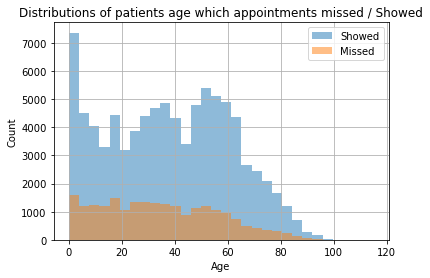

There are downward trend on missed appointments between 1-19 years old and greater than 65 years old.


In [31]:
# histogram for ages of patients
df_show.Age.hist(alpha=0.5, bins=30, label="Showed")
df_miss.Age.hist(alpha=0.5, bins=30, label="Missed")
plot.legend();
plot.title('Distributions of patients age which appointments missed / Showed')
plot.xlabel("Age")
plot.ylabel("Count")
plot.show();

print('There are downward trend on missed appointments between 1-19 years old and greater than 65 years old.'.format(df.shape[0]))

### Research Question 4  (Comparison between No-Show / Show based on receiving an SMS message or not?)

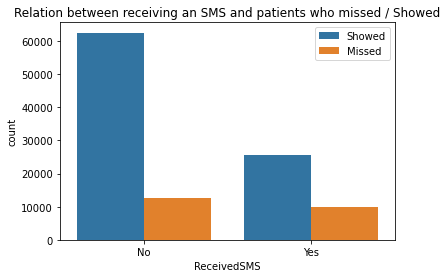

The total patients appointments 110526.
Patients not Received SMS 75044, 12535 were missed with the ratio of 17%.
Patients Received SMS 35482, 9784 were missed with the ratio of 28%.


In [32]:
# sb.countplot(x=df.ReceivedSMS, hue=df.NoShow, data=df)
# plot.xticks([0,1],['No','Yes'])
# plot.title("Relation between receiving an SMS and patients who missed / Showed")
# plot.legend(labels=['Showed','Missed'])
# plot.show();

draw_countplot(df.ReceivedSMS,['No','Yes'],"Relation between receiving an SMS and patients who missed / Showed")

# Claculate ratio of ReceivedSMS
not_ReceivedSMS = len(df[df['ReceivedSMS'] == 0])
ReceivedSMS = len(df[df['ReceivedSMS'] == 1])

missed_not_ReceivedSMS = len(df_miss[df_miss['ReceivedSMS']==0])
missed_ReceivedSMS = len(df_miss[df_miss['ReceivedSMS']==1])

missed_ratio_not_ReceivedSMS = int(round(missed_not_ReceivedSMS/not_ReceivedSMS*100))
missed_ratio_ReceivedSMS = int(round(missed_ReceivedSMS/ReceivedSMS*100))

print('The total patients appointments {}.'.format(df.shape[0]))
print('Patients not Received SMS {}, {} were missed with the ratio of {}%.'.format(not_ReceivedSMS, missed_not_ReceivedSMS, missed_ratio_not_ReceivedSMS))
print('Patients Received SMS {}, {} were missed with the ratio of {}%.'.format(ReceivedSMS, missed_ReceivedSMS, missed_ratio_ReceivedSMS))


## Limitations
- The dataset need more data to improve clearity of analysis.
- There are some data such as patients with age 0 or less need more explination.

<a id='conclusions'></a>
## Conclusions

I have looked into the dataset to check null data, duplicated, check if there problems like typos names, removing wrong data and check data type. Also, removed some of the columns from the dataframe that was not needed.

**And these are the results of these analyses:**
- Percentage of patients missed appointments 20%.
- There is no correlation between gender alone and missing the appointment.
- There are downward trend on missed appointments between 1-19 years old and greater than 65 years old.
- The ratio of Received SMS and missed appointments is 28% which is high rither than not Received SMS 17% and missed appointments.